In [3]:
import numpy as np
import pandas as pd
import mlflow
import warnings
import pickle
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sys, os

In [4]:
# sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

In [5]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler

In [6]:
file_handler = FileHandler()
train_sales = pd.read_csv("../data/train.csv")

In [8]:
data = train_sales.groupby("Date").agg({"Sales": "mean"})
data

,Sales
Date,
2013-01-01,87.284560
2013-01-02,6233.030493
2013-01-03,5693.112108
2013-01-04,5954.218834
2013-01-05,5337.751570
...,...
2015-07-27,9602.952466
2015-07-28,8174.953363
2015-07-29,7623.284305


In [14]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data)
data['DataScaled'] = scaled_array

In [15]:
data.describe()

,Sales,DataScaled
count,942.000000,9.420000e+02
mean,5782.702036,-1.185652e-16
std,2888.462029,1.000531e+00
min,87.284560,-1.972829e+00
25%,5321.408512,-1.597870e-01
50%,6036.153617,8.779282e-02
75%,7530.909865,6.055598e-01
max,14012.150673,2.850590e+00


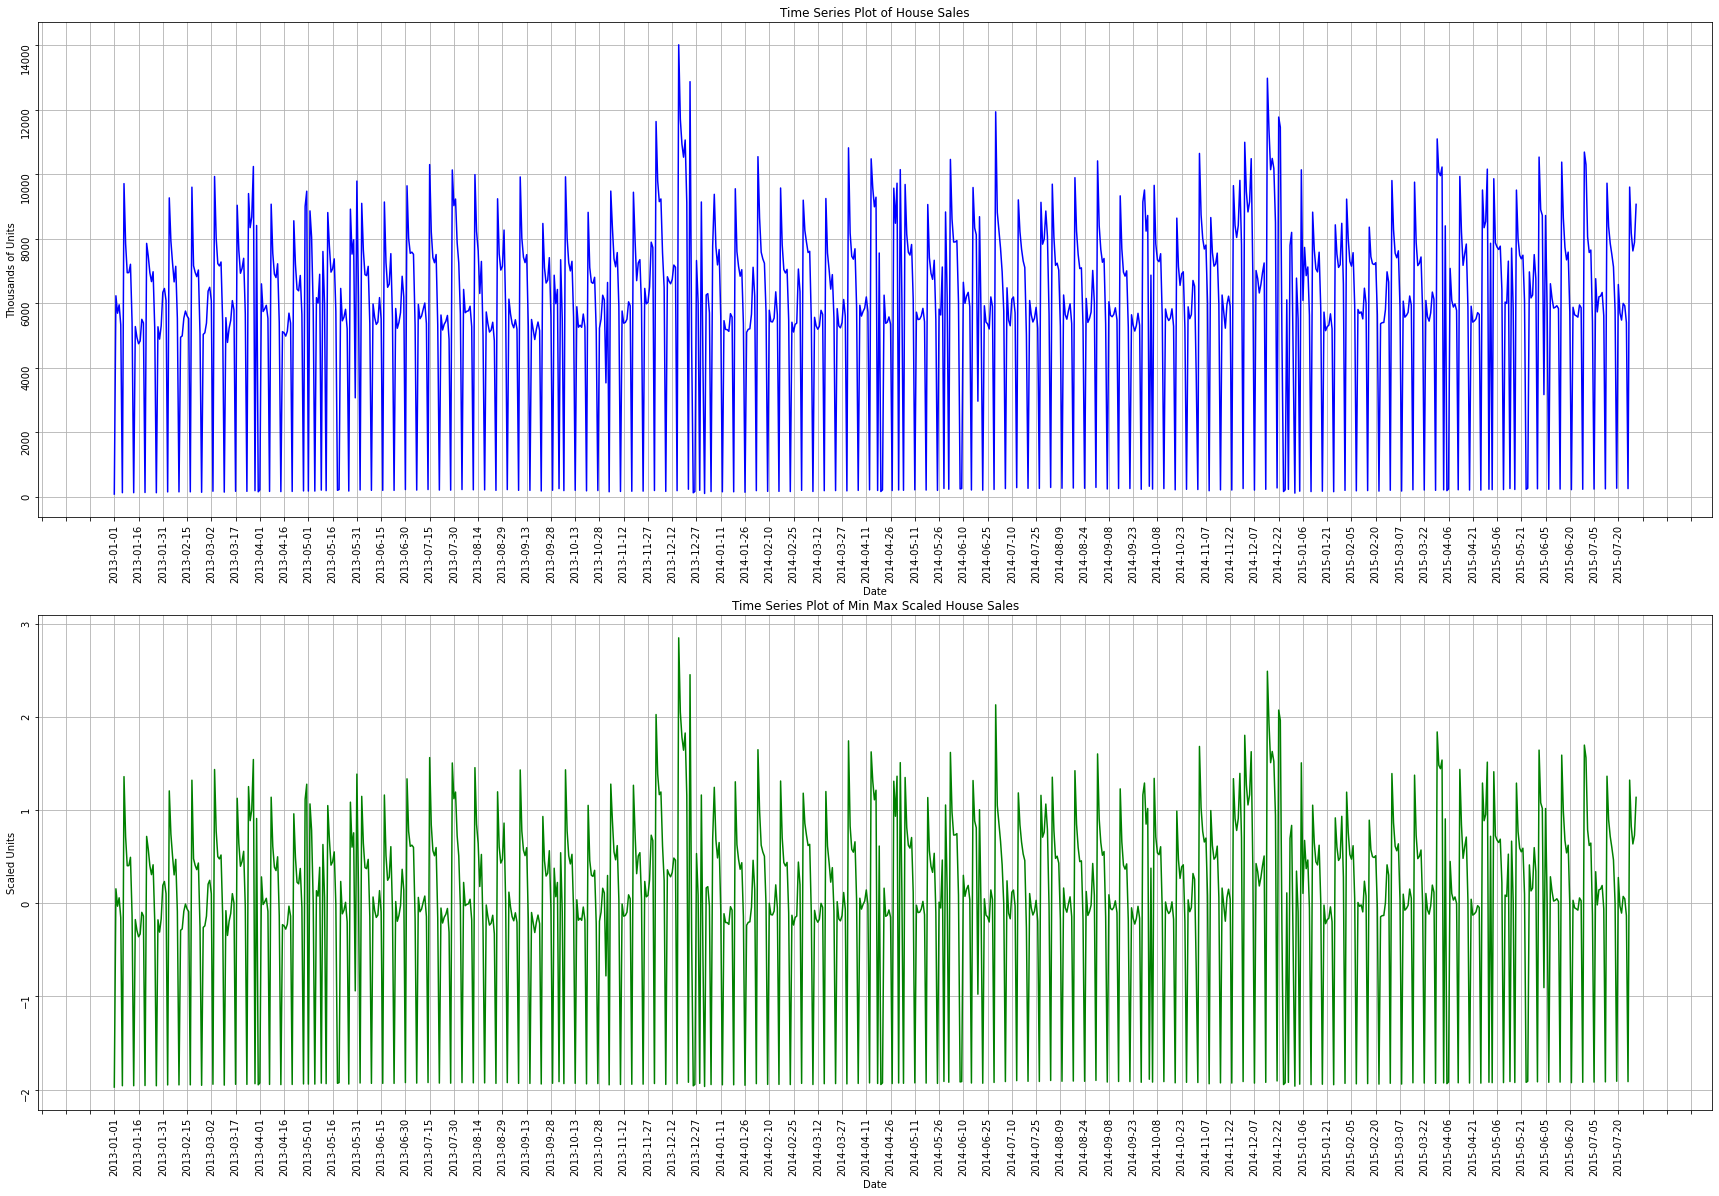

In [16]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(20)
fig.set_figwidth(30)
fig.tight_layout(pad=15)

M = 100
xticks = ticker.MaxNLocator(M)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(data.index, data.Sales, 'b-')
ax1.xaxis.set_major_locator(xticks)
ax1.tick_params(labelrotation=90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Thousands of Units')
ax1.title.set_text('Time Series Plot of House Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(data.index, data.DataScaled, 'g-')
ax2.xaxis.set_major_locator(xticks)
ax2.tick_params(labelrotation=90)
ax2.set_xlabel('Date')
ax2.set_ylabel('Scaled Units')
ax2.title.set_text('Time Series Plot of Min Max Scaled House Sales')
ax2.grid(True)
plt.show()

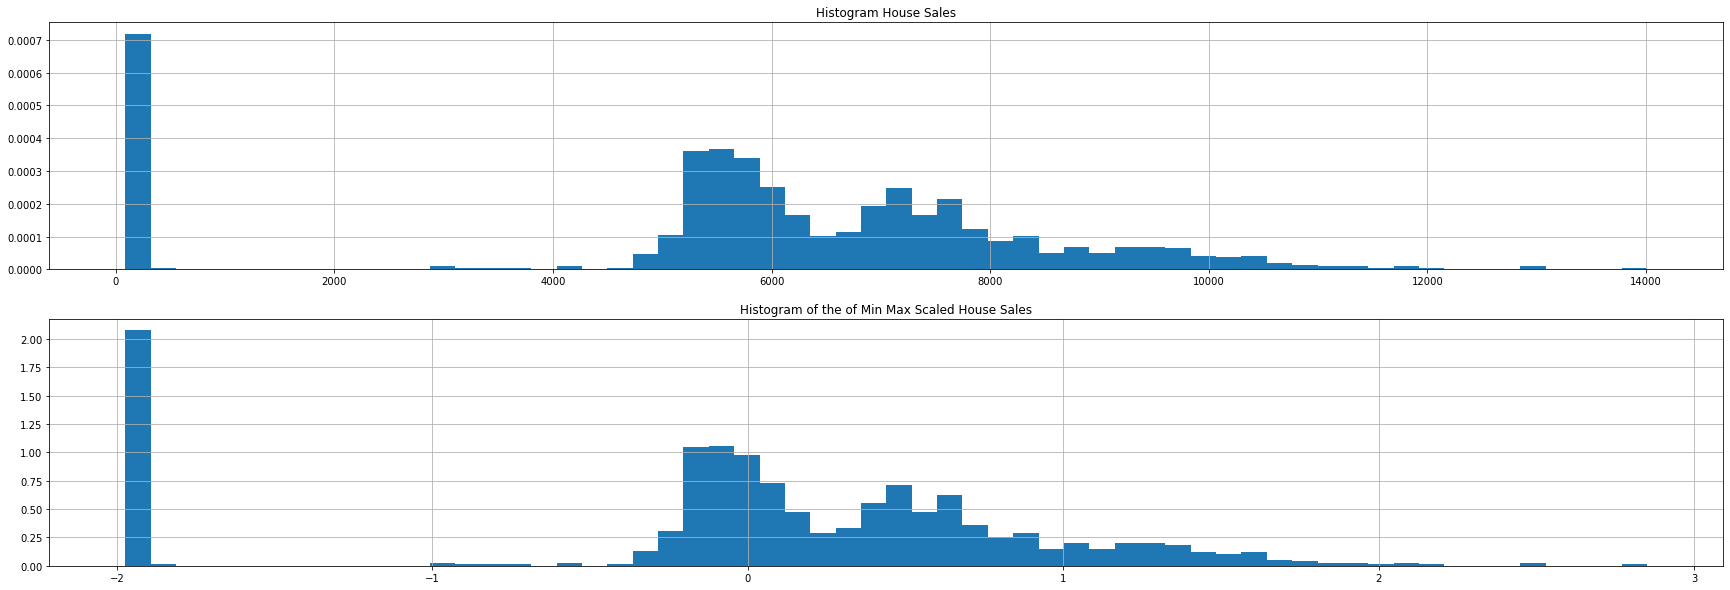

In [18]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(10)
fig.set_figwidth(30)
fig.tight_layout(pad=6)

ax1 = fig.add_subplot(gs[0,0])
ax1.hist(data.Sales, density=True, bins=60)
ax1.title.set_text('Histogram House Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.hist(data.DataScaled, density=True, bins=60)
ax2.title.set_text('Histogram of the of Min Max Scaled House Sales')
ax2.grid(True)
plt.show()

### Unit Root Test

In [20]:
adfResult = adfuller(data.Sales.values, autolag='AIC')
print(f'ADF Statistic: {adfResult[0]}')
print(f'p-value: {adfResult[1]}')

ADF Statistic: -5.650822837207897
p-value: 9.870006549261963e-07


In [22]:
adfResult = adfuller(data.DataScaled.values, autolag='AIC')
print(f'ADF Statistic: {adfResult[0]}')
print(f'p-value: {adfResult[1]}')

ADF Statistic: -5.650822837207894
p-value: 9.870006549262126e-07
